# Normalisation, Cas concret, scikit learn

Algorithme des plus proches voisins

knn : k nearest neighbors

> Ne pas utiliser scikit learn pour l'instant
> 
> Ce en sera qu'en seconde partie du  paragraphe : "Application à un vrai jeu de données", je vous ferai signe!

In [1]:
def kNN():
    #    ---------- >>>
    #    <<< ---------- 
    pass

## Normalisation

### Normalisation: motivation

Création d'un jeu de données d'exemple

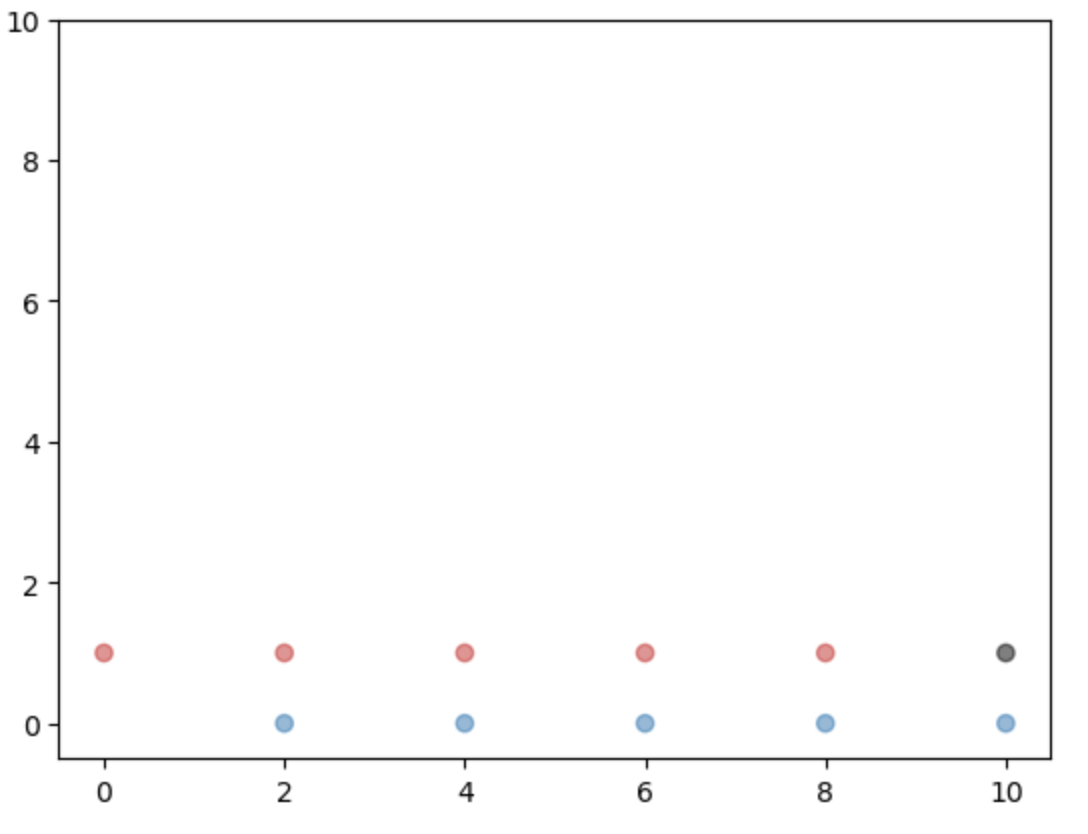

`(10, 1)` serait rouge mais classé bleu pour  k=1, k =3

In [2]:
#    ---------- >>>
#    <<< ---------- 

### Moyenne, variance et écart type

Pour l'ensemble de n valeurs `x = [x_1, ..., x_n ]`, on définit:
- la moyenne (mean):
$$\overline{x} = \mu = \frac{1}{n} \sum_{i=1}^{n}x_{i}$$
- La variance qui est une mesure de la dispersion de l'échantillon, c'est la moyenne des carrés des distances à la moyenne de l'échantillon.
$$Var(x)=\sigma^2=\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\mu)^2$$
- l'écart type (standard deviation) 
$$\sigma=\sqrt{Var(x)}=\sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\overline{x})^2}$$

### Normalisation standard

Pour l'ensemble de n valeurs $x = [x_1, ..., x_n ]$, on définit:
$$z_{i} = \frac{x_{i}-\mu}{\sigma}$$

On utilise `z`à la place de `x`

On fait le même procédé sur chacun des axes

In [3]:
#    ---------- >>>
#    <<< ---------- 

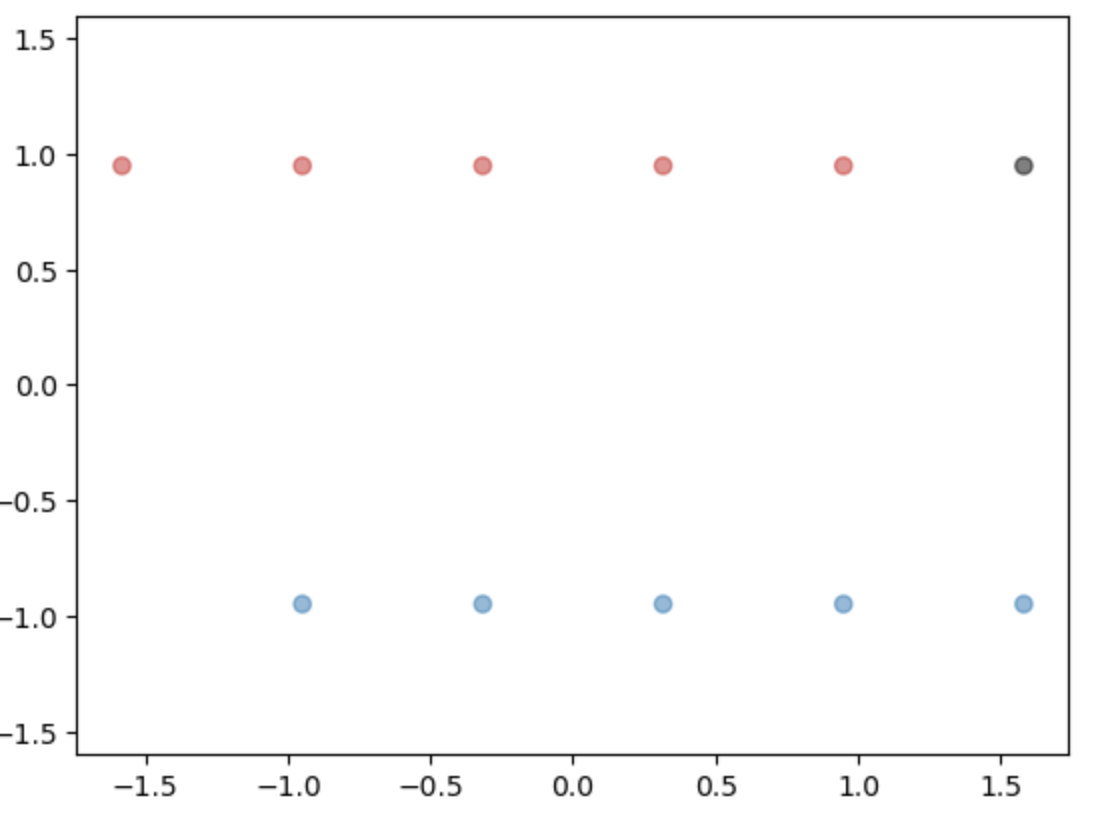

`(10, 1)` bleu pour  k=1, k =3?

In [4]:
#    ---------- >>>
#    <<< ---------- 

## Parallèle avec scikit learn

Nous allons coder deux classes au fonctionnement similaire à celles de scikit learn: StandardScaler pour la normalisation et NearestNeighbors pour le knn.

### Nomenclature

In [5]:
import pandas as pd
from collections import namedtuple

Point = namedtuple('Point', 'x y')

points_bleus = [Point(x, 0) for x in range(2,12,2)]
points_rouges = [Point(x, 1) for x in range(0,10,2)]

points = points_bleus + points_rouges
couleurs = ['bleu']*len(points_bleus) + ['rouge']*len(points_rouges)

data = pd.DataFrame({'abscisse' : [point.x for point in points],
                     'ordonnée' : [point.y for point in points],
                     'couleur' : couleurs})
data

# observation // individu
# X : caractéristiques (features), ici [abscisse, ordonnée], [x_1, x_2]
# y : classes, cibles, ici couleurs

,abscisse,ordonnée,couleur
0,2,0,bleu
1,4,0,bleu
2,6,0,bleu
3,8,0,bleu
4,10,0,bleu
5,0,1,rouge
6,2,1,rouge
7,4,1,rouge
8,6,1,rouge
9,8,1,rouge


In [6]:
# Scikit-learn travaille avec des valeurs numériques
# Notre algorithme quant à lui autorise des valeurs textuelles pour y
[c=='bleu' for c in couleurs]

[True, True, True, True, True, False, False, False, False, False]

In [7]:
data = pd.DataFrame({'x_1' : [point.x for point in points],
                     'x_2' : [point.y for point in points],
                     'y' : [int(c=='bleu') for c in couleurs]})
data

,x_1,x_2,y
0,2,0,1
1,4,0,1
2,6,0,1
3,8,0,1
4,10,0,1
5,0,1,0
6,2,1,0
7,4,1,0
8,6,1,0
9,8,1,0


In [8]:
# X
X = pd.DataFrame({'x_1' : [point.x for point in points],
                     'x_2' : [point.y for point in points]})
print(X.to_string(index=False))

 x_1  x_2
   2    0
   4    0
   6    0
   8    0
  10    0
   0    1
   2    1
   4    1
   6    1
   8    1


$$
X=
\begin{bmatrix}
2 & 0\\ 
4 & 0\\ 
6 & 0\\ 
\vdots & \vdots \\ 
8 & 1\\ 
\end{bmatrix}
$$

In [9]:
# y
y = pd.DataFrame({'y' : [int(c=='bleu') for c in couleurs]})
print(y.to_string(index=False))

 y
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0


$$
y=
\begin{bmatrix}
1\\ 
1\\ 
1\\ 
\vdots \\ 
0\\ 
\end{bmatrix}
$$

### Standardisation

[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [10]:
class Scaler():
    def __init__(self):
        pass
    def fit(self, X):
        """Compute the mean and std to be used for later scaling."""
        pass
    def transform(self, X):
        """Perform standardization by centering and scaling."""
        pass

    scaler = Scaler()
    scaler.fit(points)
    scaler.transform(points)

### Classification

[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [11]:
class knnClassifier():
    def __init__():
        pass
        
    def fit(X, y):
        """Fit the nearest neighbors estimator from the training dataset."""
        pass
    
    def predict(X):
        """Predict the class labels for the provided data."""
        pass

### Sans normalisation
    classifier = knnClassifier()
    classifier.fit(points, couleurs)
    classifier.predict(points_inconnus)

### Avec normalisation

    scaler = Scaler()
    scaler.fit(points)
    points_normalisés = scaler.transform(points)

    classifier = knnClassifier()
    classifier.fit(points_normalisés, couleurs)

    points_inconnus_normalisés = scaler.transform(points_inconnus)
    classifier.predict(points_inconnus_normalisés)

## Application à un vrai jeu de données

Peut-on prédire si un client va acheter une assurance ou pas?

datasets Caravan


    from ISLP import load_data
    Caravan = load_data('Caravan')
    Caravan.columns

Séparation du jeu de données en données d'entraînement (80%) et données de test (20%)

In [12]:
# Avec normalisation et votre algorithme

Le taux d'erreur KNN sur les 1 000 observations de test est d'environ 10%. À première vue, cela peut paraître plutôt bon. Cependant, étant donné qu'un peu plus de 6 % des clients ont souscrit une assurance, nous pourrions réduire le taux d'erreur à près de 6 % en prédisant toujours Non, quelles que soient les valeurs des prédicteurs ! C'est ce qu'on appelle le taux nul.}

Supposons qu’il y ait un coût non négligeable à tenter de vendre une assurance à un individu donné. Par exemple, un vendeur doit peut-être rendre visite à chaque client potentiel. Si l’entreprise tente de vendre de l’assurance à une sélection aléatoire de clients, le taux de réussite ne sera que de 6 %, ce qui pourrait être bien trop faible compte tenu des coûts impliqués. Au lieu de cela, l’entreprise aimerait essayer de vendre de l’assurance uniquement aux clients susceptibles de l’acheter. Le taux d’erreur global n’a donc aucun intérêt. Au lieu de cela, la fraction d’individus dont on prévoit correctement qu’ils souscriront une assurance est intéressante.

In [13]:
# Avec normalisation et scikit-learn

## Références

[Introduction to Statistical Learning with applications in Python: Logistic Regression, LDA, QDA, and KNN](https://islp.readthedocs.io/en/latest/labs/Ch04-classification-lab.html)